<a href="https://colab.research.google.com/github/PedroOlavo/Bolsa_IC/blob/main/Tarefa_Ic_Joelho_Canal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste de rede neural com o banco que criei a partir do canal 2, foram usadas 4 métricas para avaliar se o classificador estava funcionando bem.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/banco_canal2')
dados.shape

(86, 1502)

In [ ]:
dados.drop(columns=['Unnamed: 0'], inplace=True)
dados.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,class
0,-0.0038,-0.0068,-0.0053,0.0015,0.0052,0.0030,0.0022,0.0030,0.0045,0.0067,0.0060,0.0045,0.0067,0.0097,0.0127,0.0105,0.0007,-0.0053,-0.0091,-0.0105,-0.0030,0.0030,0.0030,0.0000,-0.0008,-0.0008,0.0030,0.0067,0.0082,0.0090,0.0067,0.0082,0.0090,0.0075,0.0052,0.0052,0.0090,0.0150,0.0142,0.0090,...,0.0217,0.0142,0.0030,-0.0046,-0.0008,0.0045,0.0075,0.0090,0.0067,0.0052,0.0030,-0.0015,-0.0008,0.0030,0.0067,0.0045,0.0015,0.0015,-0.0015,-0.0046,-0.0075,-0.0060,0.0007,0.0082,0.0112,0.0045,-0.0083,-0.0203,-0.0181,-0.0105,-0.0091,-0.0053,-0.0053,-0.0030,-0.0008,0.0007,0.0022,-0.0008,-0.0015,0
1,-0.0030,-0.0030,0.0052,0.0067,0.0007,-0.0046,-0.0030,0.0007,0.0007,0.0052,0.0030,-0.0038,-0.0068,-0.0091,-0.0083,-0.0068,-0.0008,0.0052,0.0052,0.0075,0.0090,0.0090,0.0067,0.0037,0.0030,0.0037,0.0037,0.0030,0.0015,0.0022,0.0030,0.0037,0.0075,0.0067,0.0045,-0.0030,-0.0098,-0.0075,0.0000,0.0007,...,-0.0015,-0.0008,-0.0023,-0.0015,-0.0008,0.0015,0.0015,-0.0008,-0.0015,-0.0008,-0.0015,-0.0046,-0.0030,-0.0030,-0.0060,-0.0068,-0.0068,-0.0075,-0.0083,-0.0083,-0.0075,-0.0075,-0.0083,-0.0091,-0.0083,-0.0068,-0.0068,-0.0038,-0.0008,-0.0008,-0.0008,-0.0015,-0.0030,-0.0023,0.0000,-0.0008,0.0007,0.0007,0.0015,0
2,0.0045,0.0045,0.0052,0.0037,0.0030,0.0082,0.0067,0.0082,0.0067,0.0060,0.0067,0.0052,0.0045,0.0037,0.0045,0.0022,0.0030,0.0045,0.0030,0.0045,0.0045,0.0052,0.0067,0.0067,0.0067,0.0090,0.0060,-0.0008,0.0015,0.0015,-0.0008,-0.0008,-0.0023,0.0007,-0.0008,0.0007,0.0030,0.0015,0.0007,0.0007,...,0.0030,0.0007,0.0007,0.0015,0.0022,0.0030,0.0037,0.0015,0.0015,0.0030,0.0015,-0.0008,-0.0008,0.0007,-0.0008,-0.0023,-0.0030,-0.0068,-0.0053,-0.0008,0.0015,0.0015,0.0030,0.0037,0.0015,-0.0015,0.0015,0.0022,-0.0015,-0.0030,-0.0030,-0.0038,-0.0046,-0.0046,-0.0023,0.0007,0.0030,0.0037,0.0045,0
3,-0.0030,-0.0030,-0.0015,0.0000,0.0000,-0.0008,-0.0008,-0.0008,-0.0030,-0.0030,-0.0023,-0.0015,-0.0008,-0.0015,-0.0030,-0.0046,-0.0030,-0.0038,-0.0023,0.0015,-0.0008,-0.0008,-0.0015,-0.0008,0.0007,0.0000,0.0015,0.0045,0.0090,0.0090,0.0090,0.0052,0.0030,0.0045,0.0037,0.0007,-0.0015,-0.0015,-0.0053,-0.0060,...,0.0060,0.0090,0.0090,0.0082,0.0090,0.0067,0.0067,-0.0068,-0.0195,0.0037,0.0127,-0.0158,-0.0203,-0.0158,-0.0120,0.0007,0.0015,0.0030,-0.0008,-0.0008,0.0022,0.0000,0.0037,0.0030,-0.0015,-0.0068,-0.0098,-0.0091,-0.0083,-0.0023,-0.0023,-0.0083,-0.0068,-0.0060,-0.0023,0.0022,-0.0015,-0.0038,-0.0008,0
4,-0.0030,-0.0053,-0.0046,-0.0083,-0.0143,-0.0128,-0.0038,0.0075,0.0090,0.0060,0.0067,0.0097,0.0090,0.0105,0.0120,0.0120,0.0075,-0.0015,-0.0008,0.0060,0.0052,0.0052,0.0060,0.0045,-0.0091,-0.0218,-0.0181,-0.0150,-0.0181,-0.0195,-0.0195,-0.0218,-0.0165,-0.0046,0.0112,0.0142,0.0120,0.0217,0.0345,0.0382,...,-0.0023,-0.0046,-0.0053,-0.0068,-0.0060,-0.0068,-0.0068,-0.0046,-0.0046,-0.0053,-0.0053,-0.0053,-0.0053,-0.0053,-0.0046,-0.0068,-0.0053,-0.0046,-0.0068,-0.0038,-0.0023,-0.0030,-0.0008,0.0007,0.0037,0.0075,0.0067,0.0045,0.0030,0.0022,0.0007,-0.0008,0.0007,0.0007,-0.0030,-0.0060,-0.0083,-0.0091,-0.0046,0


In [ ]:
from sklearn.model_selection import train_test_split
y = dados['class']
dados.drop(columns=['class'], inplace=True)
x = dados
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
62,0.0375,0.0150,-0.0330,-0.0818,-0.0998,-0.0315,0.0232,0.0330,0.0420,0.0112,0.0112,0.0060,0.0000,0.0097,0.0037,0.0007,-0.0143,-0.0293,-0.0405,-0.0225,-0.0038,0.0105,0.0382,0.0442,0.0367,0.0187,-0.0046,-0.0165,-0.0158,-0.0091,0.0007,0.0105,0.0142,0.0097,0.0052,0.0135,0.0120,-0.0030,-0.0240,-0.0293,...,0.0030,0.0090,0.0052,0.0067,0.0030,0.0030,-0.0015,0.0060,0.0112,0.0195,0.0315,0.0180,0.0015,-0.0113,-0.0308,-0.0203,0.0112,0.0277,0.0457,0.0427,0.0112,0.0090,0.0142,0.0105,0.0075,0.0030,-0.0030,-0.0128,-0.0165,-0.0143,0.0082,0.0367,0.0412,0.0172,-0.0068,-0.0225,-0.0128,0.0052,0.0097,0.0105
60,-0.0008,0.0007,0.0015,0.0015,0.0015,0.0015,0.0007,0.0030,0.0037,0.0045,0.0045,0.0052,0.0045,0.0015,0.0007,-0.0015,-0.0008,0.0015,0.0022,0.0030,0.0045,0.0067,0.0060,0.0067,0.0067,0.0052,0.0060,0.0052,0.0060,0.0052,0.0060,0.0052,0.0015,0.0007,-0.0008,-0.0023,-0.0046,-0.0060,-0.0068,-0.0068,...,-0.0046,-0.0038,-0.0015,-0.0053,-0.0023,0.0052,0.0015,0.0007,0.0037,0.0015,0.0030,0.0015,-0.0008,-0.0030,-0.0030,-0.0015,-0.0030,-0.0038,-0.0038,0.0007,0.0007,-0.0008,0.0007,0.0000,-0.0015,-0.0015,0.0007,0.0000,0.0007,-0.0008,-0.0015,0.0007,0.0007,0.0015,0.0015,0.0030,0.0052,0.0052,0.0052,0.0037
49,-0.0023,-0.0015,0.0000,-0.0008,-0.0008,-0.0008,-0.0015,-0.0015,-0.0015,-0.0008,-0.0023,-0.0015,-0.0030,-0.0030,-0.0015,-0.0008,-0.0008,0.0007,0.0000,-0.0008,-0.0015,-0.0015,-0.0015,-0.0038,-0.0046,-0.0030,-0.0030,-0.0046,-0.0038,-0.0015,0.0007,0.0015,0.0000,0.0015,0.0015,0.0015,0.0015,0.0015,0.0007,0.0000,...,-0.0008,-0.0015,-0.0015,-0.0008,-0.0015,-0.0023,-0.0015,-0.0008,-0.0008,0.0007,0.0015,0.0007,-0.0008,0.0000,-0.0008,-0.0008,-0.0015,-0.0015,-0.0008,-0.0008,-0.0015,-0.0015,-0.0015,0.0000,-0.0015,0.0000,0.0007,0.0007,0.0007,0.0007,-0.0008,-0.0015,0.0000,0.0007,-0.0008,-0.0008,-0.0015,-0.0038,-0.0015,0.0000
33,0.0495,0.0592,0.0315,0.0082,0.0015,-0.0143,-0.0143,-0.0181,-0.0158,-0.0181,-0.0143,-0.0098,-0.0120,-0.0113,-0.0105,-0.0046,-0.0046,-0.0046,-0.0053,-0.0030,-0.0143,-0.0270,-0.0263,-0.0203,-0.0188,-0.0240,-0.0158,-0.0165,-0.0165,0.0135,0.0525,0.0487,0.0180,0.0000,-0.0195,-0.0143,0.0052,0.0232,0.0112,-0.0060,...,-0.0203,-0.0195,0.0015,0.0480,0.0615,0.0315,0.0105,-0.0098,-0.0203,-0.0256,-0.0293,-0.0143,0.0150,0.0382,0.0082,-0.0203,-0.0248,-0.0285,-0.0188,-0.0165,-0.0150,-0.0143,-0.0135,-0.0105,-0.0105,-0.0075,-0.0075,-0.0128,-0.0203,-0.0263,-0.0330,-0.0368,-0.0270,-0.0165,-0.0083,0.0082,0.0457,0.0787,0.0817,0.0690
39,0.0030,-0.0008,-0.0030,-0.0075,-0.0091,-0.0053,-0.0046,0.0007,0.0127,0.0300,0.0315,0.0232,0.0285,0.0105,-0.0075,-0.0128,-0.0203,-0.0210,-0.0240,-0.0240,-0.0308,-0.0195,0.0105,0.0127,-0.0105,-0.0315,-0.0436,-0.0436,-0.0465,-0.0405,-0.0218,-0.0128,0.0007,0.0210,0.0630,0.1237,0.1027,0.0367,0.0382,0.0322,...,-0.0563,-0.0653,-0.0158,0.0180,0.0187,0.0120,0.0037,0.0030,0.0007,0.0000,0.0000,0.0000,-0.0023,-0.0060,0.0015,0.0105,0.0157,0.0285,0.0292,0.0210,0.0142,0.0097,0.0045,-0.0098,-0.0135,-0.0030,-0.0008,0.0000,-0.0053,-0.0120,0.0015,0.0120,0.0022,0.0007,0.0060,0.0075,0.0007,-0.0150,-0.0105,-0.0030


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(X_train)

array([[ 1.87290434e+00,  8.25924642e-01, -1.31714195e+00, ...,
         1.73559386e-01,  2.67634622e-01,  4.04169587e-01],
       [ 4.95897146e-02,  1.12213953e-01,  1.69247319e-01, ...,
         1.73559386e-01,  9.79672167e-02,  1.00316277e-01],
       [-2.18194744e-02,  2.41230886e-03,  1.04621699e-01, ...,
        -1.85942219e-01, -1.54648698e-01, -6.50156716e-02],
       ...,
       [ 2.51558704e+00,  2.69754358e+00,  1.84951345e+00, ...,
        -2.17897917e-01, -2.71530688e-01, -1.99068603e-01],
       [-2.69371330e-01, -3.76902463e-01, -2.87440399e-01, ...,
        -3.05776087e-01, -2.71530688e-01, -3.01842517e-01],
       [ 1.59083805e-01,  1.52141824e-01,  1.04621699e-01, ...,
        -9.40695864e-02, -2.11204500e-01, -1.99068603e-01]])

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
rede = MLPClassifier(activation='identity',random_state=1)

In [ ]:
layers = [(10,),(20,),(30,),(40,),(50,),(2,2),(3,3),(4,4),(5,5)]
df = pd.DataFrame(columns=['Camadas', 'Acurácia', 'Precisão', 'Recall', 'F1 Score'])
i = 0
for layer in layers:
  lista = []
  rede = MLPClassifier(hidden_layer_sizes=layer, random_state=1);
  rede.fit(X_train,Y_train);
  pred = rede.predict(X_test);
  acc = accuracy_score(Y_test, pred);
  prec = precision_score(Y_test, pred);
  rec = recall_score(Y_test, pred);
  f1 = f1_score(Y_test, pred);
  lista.append(layer)
  lista.append(acc)
  lista.append(prec)
  lista.append(rec)
  lista.append(f1)
  df.loc[i] = lista
  i = i + 1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
ativações = ['relu', 'identity', 'logistic', 'tanh']
layers = [(10,),(20,),(30,),(40,),(50,),(2,2),(3,3),(4,4),(5,5)]
df = pd.DataFrame(columns=['Ativação','Camadas', 'Acurácia', 'Precisão', 'Recall', 'F1 Score'])
i = 0
for ativação in ativações:
  i = i
  for layer in layers:
    lista = []
    rede = MLPClassifier(activation=ativação,hidden_layer_sizes=layer,max_iter=300 ,random_state=1);
    rede.fit(X_train,Y_train);
    pred = rede.predict(X_test);
    acc = accuracy_score(Y_test, pred);
    prec = precision_score(Y_test, pred);
    rec = recall_score(Y_test, pred);
    f1 = f1_score(Y_test, pred);
    lista.append(ativação)
    lista.append(layer)
    lista.append(acc)
    lista.append(prec)
    lista.append(rec)
    lista.append(f1)
    df.loc[i] = lista
    i = i + 1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



variar as camadas escondidas

aumentando e diminuindo os neuronios

testar tbm as diferentes ativações


In [ ]:
df_tanh = df.loc[df['Ativação']=='tanh']
df_relu = df.loc[df['Ativação']=='relu']
df_identity = df.loc[df['Ativação']=='identity']
df_logistic = df.loc[df['Ativação']=='logistic']

In [ ]:
df.Acurácia.max()

0.6923076923076923

In [ ]:
df_relu

,Ativação,Camadas,Acurácia,Precisão,Recall,F1 Score
0,relu,"(10,)",0.538462,0.666667,0.400000,0.500000
1,relu,"(20,)",0.500000,0.571429,0.533333,0.551724
2,relu,"(30,)",0.538462,0.636364,0.466667,0.538462
3,relu,"(40,)",0.538462,0.666667,0.400000,0.500000
4,relu,"(50,)",0.538462,0.666667,0.400000,0.500000
5,relu,"(2, 2)",0.576923,0.576923,1.000000,0.731707
6,relu,"(3, 3)",0.576923,0.576923,1.000000,0.731707
7,relu,"(4, 4)",0.692308,0.818182,0.600000,0.692308
8,relu,"(5, 5)",0.500000,0.625000,0.333333,0.434783


In [ ]:
melhor_rede = MLPClassifier(hidden_layer_sizes=(4,4), max_iter=270 ,activation='relu', random_state=1)
melhor_rede.fit(X_train, Y_train)
pred_melhor_rede = melhor_rede.predict(X_test)
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (270) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
confusion_matrix(Y_test, pred_melhor_rede)

array([[9, 2],
       [6, 9]])

In [ ]:
accuracy_score(Y_test,pred_melhor_rede)

0.6538461538461539

In [ ]:
Y_test.value_counts()

1    15
0    11
Name: class, dtype: int64

In [ ]:
Y_test

38    0
44    1
27    0
40    0
36    0
81    1
58    1
69    1
85    1
56    1
67    1
53    1
48    1
66    1
63    1
10    0
2     0
35    0
68    1
45    1
19    0
80    1
34    0
32    0
31    0
43    1
Name: class, dtype: int64

In [ ]:
df.groupby(by=['Ativação', 'Camadas']).Precisão.max().sort_values(ascending=False)[:5]


Ativação  Camadas
relu      (4, 4)     0.818182
tanh      (50,)      0.666667
identity  (4, 4)     0.666667
          (10,)      0.666667
          (20,)      0.666667
Name: Precisão, dtype: float64

In [ ]:
df.groupby(by=['Ativação', 'Camadas']).Acurácia.max().sort_values(ascending=False)[:5]

Ativação  Camadas
relu      (4, 4)     0.692308
          (3, 3)     0.576923
logistic  (2, 2)     0.576923
relu      (2, 2)     0.576923
tanh      (40,)      0.538462
Name: Acurácia, dtype: float64

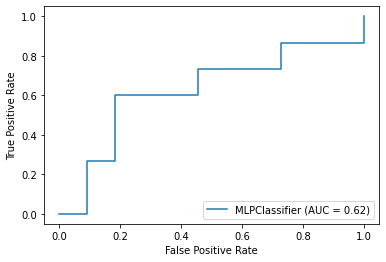

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(melhor_rede, X_test, Y_test)
